# NIDS


# importing packages and libraries

In [1]:
import pandas as pd
import numpy as np
import itertools

In [2]:
df=pd.read_csv("network_data.csv")

In [3]:
df.head(30)

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,65389,80,6,420,3,0,0,2,2,0,...,512,0,35840,140,0,0,0,0,1,DoS
1,11154,80,6,280,2,40,1,22,2,20,...,512,0,0,0,0,0,0,0,1,DoS
2,42062,1041,6,44,1,40,1,22,2,20,...,1024,0,0,0,0,0,0,0,0,Benign
3,46849,9110,6,44,1,40,1,22,2,20,...,1024,0,0,0,0,0,0,0,0,Benign
4,50360,1084,6,44,1,40,1,22,2,20,...,1024,0,0,0,0,0,0,0,0,Benign
5,51860,443,6,152,3,120,3,214,194,20,...,8192,0,0,0,0,0,0,0,0,Benign
6,56402,9012,6,232,4,132,3,31,30,19,...,29200,65535,0,0,0,0,0,0,0,Benign
7,54001,22,6,84,2,88,2,22,6,18,...,1024,29200,0,0,0,0,0,0,1,scanning
8,33372,80,6,280,2,40,1,22,2,20,...,512,0,35840,140,0,0,0,0,1,DoS
9,37085,1863,6,44,1,40,1,22,2,20,...,1024,0,0,0,0,0,0,0,1,scanning


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   L4_SRC_PORT                  99999 non-null  int64 
 1   L4_DST_PORT                  99999 non-null  int64 
 2   PROTOCOL                     99999 non-null  int64 
 3   IN_BYTES                     99999 non-null  int64 
 4   IN_PKTS                      99999 non-null  int64 
 5   OUT_BYTES                    99999 non-null  int64 
 6   OUT_PKTS                     99999 non-null  int64 
 7   TCP_FLAGS                    99999 non-null  int64 
 8   CLIENT_TCP_FLAGS             99999 non-null  int64 
 9   SERVER_TCP_FLAGS             99999 non-null  int64 
 10  FLOW_DURATION_MILLISECONDS   99999 non-null  int64 
 11  DURATION_IN                  99999 non-null  int64 
 12  DURATION_OUT                 99999 non-null  int64 
 13  MIN_TTL                      99

In [5]:
df.columns


Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'IN_BYTES', 'IN_PKTS',
       'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS',
       'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN',
       'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack'],
      dtype='object')

In [6]:
df.describe()


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,...,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label
count,99999.000000,99999.000000,99999.000000,9.999900e+04,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000
mean,40429.671497,3321.366614,10.240852,7.744449e+02,8.593586,4.116128e+03,5.255223,24.176982,22.154812,9.526115,...,2.638436,6025.289953,8392.847898,3735.884279,14.593296,4479.180922,1.343393,4.388277e+04,1.443544,0.670147
std,18423.844162,10646.096039,5.809118,2.965042e+04,478.870339,4.213230e+05,282.893644,58.356727,58.428056,17.961738,...,280.367215,13183.390585,17675.970146,11514.037495,44.976708,13301.365010,9.657515,1.358180e+07,19.372036,0.470162
min,0.000000,0.000000,1.000000,4.000000e+00,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,27268.500000,80.000000,6.000000,5.600000e+01,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,45778.000000,80.000000,6.000000,1.120000e+02,2.000000,0.000000e+00,0.000000,2.000000,2.000000,0.000000,...,0.000000,512.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
75%,55096.500000,443.000000,17.000000,2.800000e+02,3.000000,1.530000e+02,1.000000,22.000000,6.000000,20.000000,...,0.000000,4096.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
max,65535.000000,65534.000000,253.000000,6.493320e+06,108222.000000,1.235906e+08,82694.000000,223.000000,223.000000,222.000000,...,82289.000000,65535.000000,65535.000000,65280.000000,255.000000,65529.000000,255.000000,4.294916e+09,530.000000,1.000000


In [7]:
df.value_counts('Attack')

Attack
Benign            32985
DDoS              28742
DoS               23542
scanning           4955
Reconnaissance     3444
xss                3217
password           1519
injection           930
Bot                 197
Brute Force         190
Infilteration       161
Exploits             34
Fuzzers              25
Backdoor             23
Generic              19
mitm                  8
ransomware            3
Shellcode             2
Analysis              2
Theft                 1
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


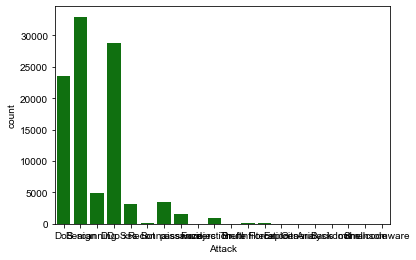

In [9]:
sns.countplot(x=df['Attack'],color='green',data=df)
sns.set(rc={'figure.figsize':(29,18)})
plt.show()

In [10]:
x=df.drop(['Attack'],axis=1)
y=df['Attack']
x.var()    #low varience filter

L4_SRC_PORT                    3.394380e+08
L4_DST_PORT                    1.133394e+08
PROTOCOL                       3.374586e+01
IN_BYTES                       8.791475e+08
IN_PKTS                        2.293168e+05
OUT_BYTES                      1.775131e+11
OUT_PKTS                       8.002881e+04
TCP_FLAGS                      3.405508e+03
CLIENT_TCP_FLAGS               3.413838e+03
SERVER_TCP_FLAGS               3.226240e+02
FLOW_DURATION_MILLISECONDS     4.576252e+12
DURATION_IN                    7.571271e+05
DURATION_OUT                   2.777959e+04
MIN_TTL                        1.546227e+03
MAX_TTL                        1.548460e+03
LONGEST_FLOW_PKT               1.807579e+05
SHORTEST_FLOW_PKT              2.048859e+03
MIN_IP_PKT_LEN                 7.296577e+02
MAX_IP_PKT_LEN                 1.807579e+05
RETRANSMITTED_IN_BYTES         5.694721e+06
RETRANSMITTED_IN_PKTS          7.403180e+00
RETRANSMITTED_OUT_BYTES        2.782024e+08
RETRANSMITTED_OUT_PKTS         1

In [11]:
x.shape

(99999, 39)

In [12]:
x.drop(['Label'],inplace=True, axis=1)

In [13]:
x.shape

(99999, 38)

<AxesSubplot:>

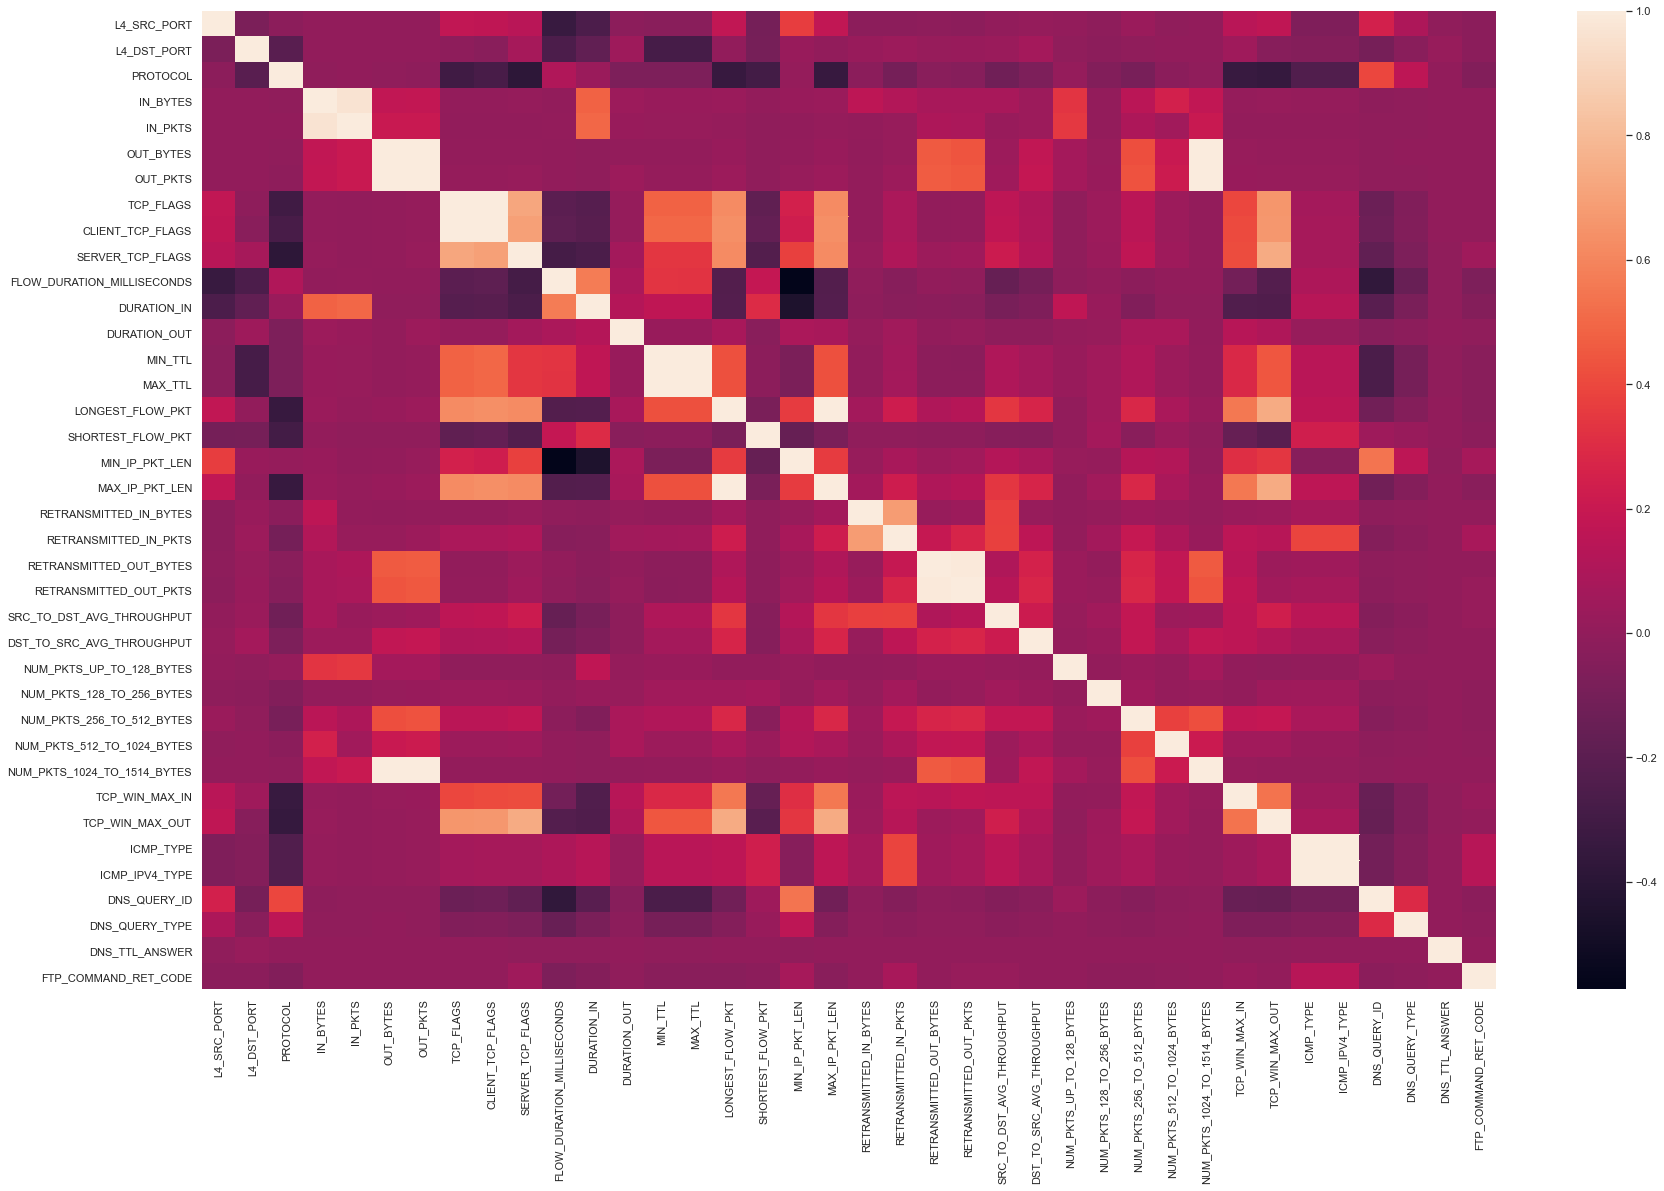

In [14]:
sns.heatmap(data=x.corr())

In [15]:
numeric=x #high correlation
corelation=numeric.corr()
high_corr=[]
for c1 in numeric.columns:
    for c2 in numeric.columns:
        if c1!=c2 and c2 not in high_corr and corelation[c1][c2]> 0.6:
            high_corr.append(c1)
            

        

In [16]:
high_corr

['IN_BYTES',
 'OUT_BYTES',
 'OUT_BYTES',
 'OUT_PKTS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'MIN_TTL',
 'LONGEST_FLOW_PKT',
 'LONGEST_FLOW_PKT',
 'MAX_IP_PKT_LEN',
 'RETRANSMITTED_IN_BYTES',
 'RETRANSMITTED_OUT_BYTES',
 'ICMP_TYPE']

In [17]:
x.drop(['IN_BYTES',
 'OUT_BYTES',
 'OUT_BYTES',
 'OUT_PKTS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'MIN_TTL',
 'LONGEST_FLOW_PKT',
 'LONGEST_FLOW_PKT',
 'MAX_IP_PKT_LEN',
 'RETRANSMITTED_IN_BYTES',
 'RETRANSMITTED_OUT_BYTES',
 'ICMP_TYPE'],inplace=True, axis=1)

In [18]:
x.shape


(99999, 26)

In [19]:
x.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'IN_PKTS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MAX_TTL',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT',
       'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES',
       'NUM_PKTS_128_TO_256_BYTES', 'NUM_PKTS_256_TO_512_BYTES',
       'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES',
       'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID',
       'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE'],
      dtype='object')

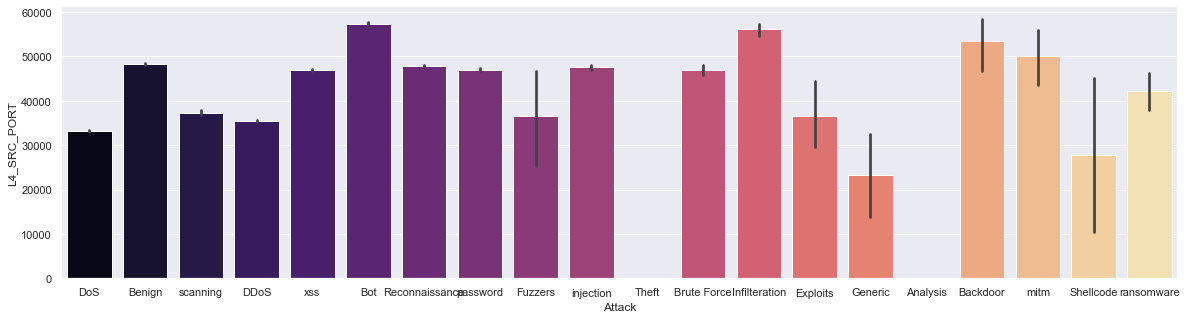

In [20]:
#barplot between Attack and L4_SRC_PORT
plt.figure(figsize=(20,5))
sns.barplot(x='Attack',y='L4_SRC_PORT',data=df,palette='magma')
plt.show()

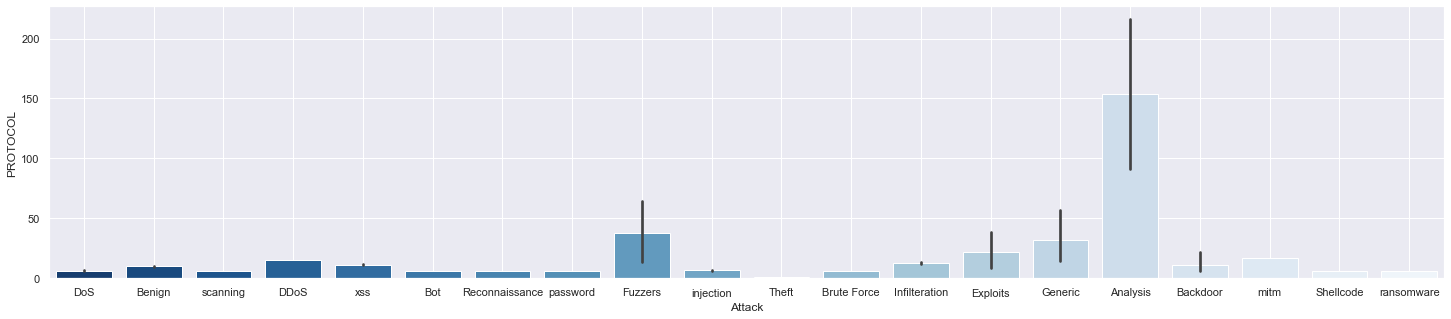

In [21]:
# barplot between Attacks and PROTOCOL
plt.figure(figsize=(25,5))
sns.barplot(x='Attack',y='PROTOCOL',data=df,palette='Blues_r')
plt.grid(True)
plt.show()

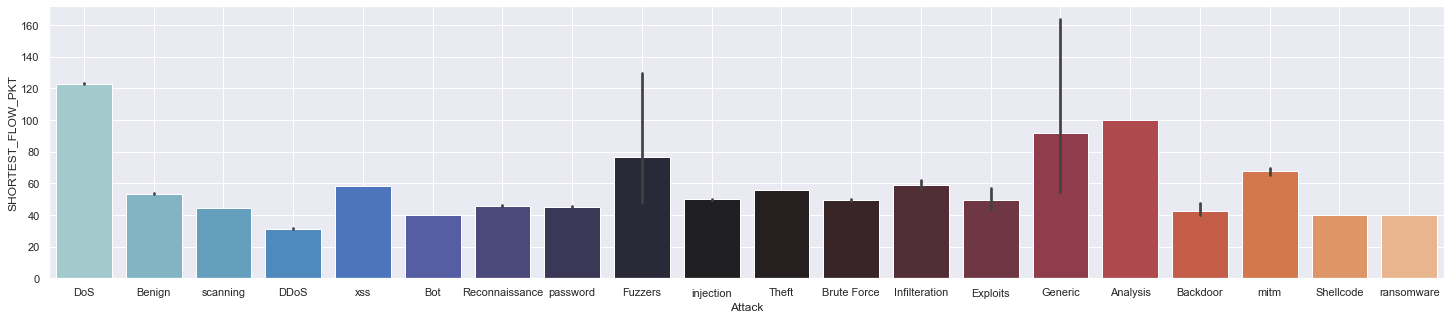

In [22]:
# barplot between Attacks and SHORTEST_FLOW_PKT
plt.figure(figsize=(25,5))
sns.barplot(x='Attack',y='SHORTEST_FLOW_PKT',data=df,palette='icefire')
plt.grid(True)
plt.show()

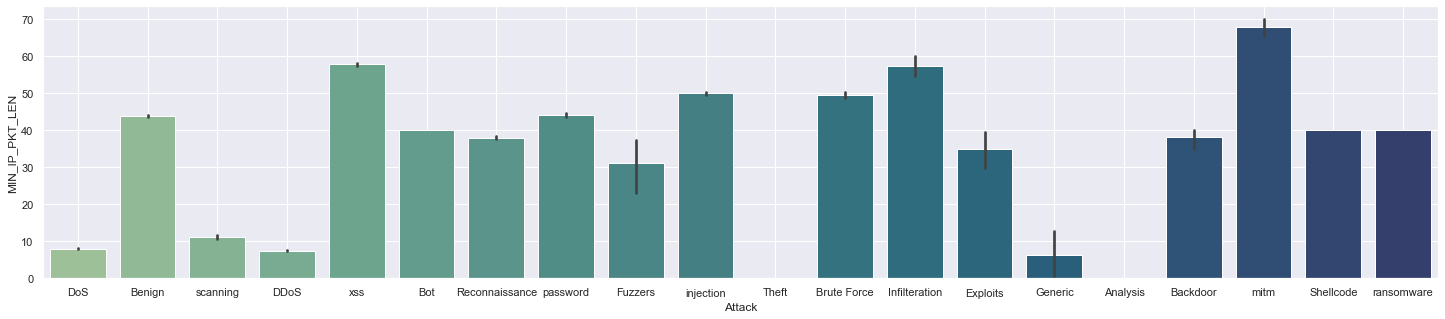

In [23]:
# barplot between Attacks and MIN_IP_PKT_LEN
plt.figure(figsize=(25,5))
sns.barplot(x='Attack',y='MIN_IP_PKT_LEN',data=df,palette='crest')
plt.grid(True)
plt.show()

In [24]:
print("X_shape--->",x.shape)
print("y_shape-->",y.shape)

X_shape---> (99999, 26)
y_shape--> (99999,)


In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=1)
print("X_train_shape--->",x_train.shape)
print("X_test_shape--->",x_test.shape)
print("y_train_shape--->",y_train.shape)
print("y_test_shape--->",y_test.shape)

X_train_shape---> (79999, 26)
X_test_shape---> (20000, 26)
y_train_shape---> (79999,)
y_test_shape---> (20000,)


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [27]:
y_pred = rfc.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 97.37 %


In [28]:
dataframe=pd.DataFrame({'Actual':y_test,'predict':y_pred})
print(dataframe)

               Actual         predict
43659          Benign          Benign
87277             xss             xss
14317             DoS             DoS
93426  Reconnaissance  Reconnaissance
95320             DoS             DoS
...               ...             ...
73440            DDoS            DDoS
1341        injection       injection
59908          Benign          Benign
26910            DDoS            DDoS
24890          Benign          Benign

[20000 rows x 2 columns]


In [29]:
imp_df = pd.DataFrame({"Feature Name": x_train.columns,"Importance": rfc.feature_importances_})
imp_df.sort_values(by="Importance", ascending=False)

,Feature Name,Importance
12,SRC_TO_DST_AVG_THROUGHPUT,0.135673
8,SHORTEST_FLOW_PKT,0.125413
14,NUM_PKTS_UP_TO_128_BYTES,0.097736
4,FLOW_DURATION_MILLISECONDS,0.085660
19,TCP_WIN_MAX_IN,0.077657
5,DURATION_IN,0.072113
1,L4_DST_PORT,0.071112
13,DST_TO_SRC_AVG_THROUGHPUT,0.057874
15,NUM_PKTS_128_TO_256_BYTES,0.042243
0,L4_SRC_PORT,0.040147


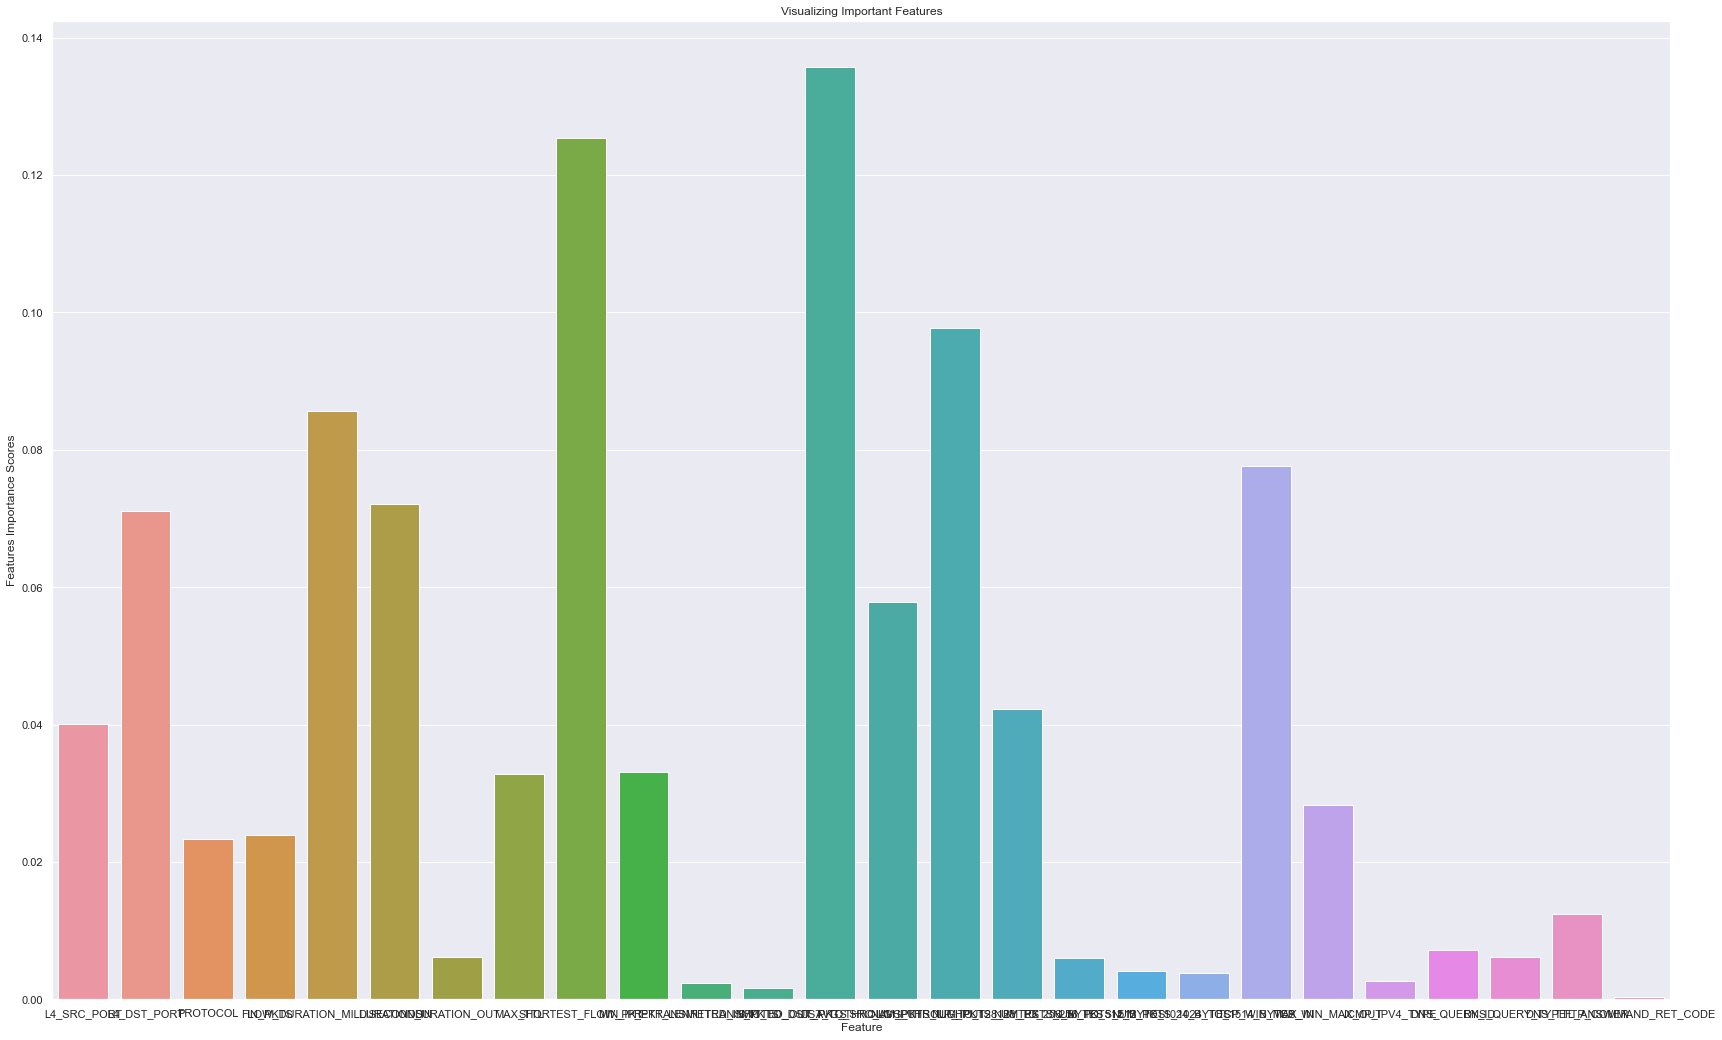

In [30]:
sns.barplot(x=x_train.columns, y=rfc.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Features Importance Scores')
plt.title("Visualizing Important Features")
sns.set(font_scale=1,rc = {'figure.figsize':(94,8)})
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [32]:
y_pred = dtree.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 96.48 %


In [33]:
dataframe=pd.DataFrame({'Actual':y_test,'predict':y_pred})
print(dataframe)

               Actual         predict
43659          Benign          Benign
87277             xss             xss
14317             DoS             DoS
93426  Reconnaissance  Reconnaissance
95320             DoS             DoS
...               ...             ...
73440            DDoS            DDoS
1341        injection       injection
59908          Benign          Benign
26910            DDoS            DDoS
24890          Benign          Benign

[20000 rows x 2 columns]


In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=1)
classifier.fit(x_train,y_train)

SVC(random_state=1)

In [35]:
y_pred = classifier.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

Accuracy:  77.375


In [36]:
dataframe=pd.DataFrame({'Actual':y_test,'predict':y_pred})
print(dataframe)

               Actual predict
43659          Benign  Benign
87277             xss    DDoS
14317             DoS     DoS
93426  Reconnaissance  Benign
95320             DoS     DoS
...               ...     ...
73440            DDoS    DDoS
1341        injection  Benign
59908          Benign  Benign
26910            DDoS    DDoS
24890          Benign  Benign

[20000 rows x 2 columns]


# ## Saving the machine learning model

In [37]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(classifier, f)

In [38]:
with open('model.pkl', 'rb') as f:
    mod=pickle.load(f)

In [39]:
import pickle
with open('model.pkl', 'rb') as f:
    mod=pickle.load(f)

In [40]:
import numpy as np
p=[[25087,80,17,0,4293998,969,0,64,28,0,0,0,224000,0,2,0,0,0,0,0,0,0,0,0,0,0],
[2426,6881,6,27,0,0,0,32,52,52,506,3,12320000,13152000,30,0,4,0,0,10136,10136,250,0,0,0,0],
[2529,12336,6,0,0,0,0,0,48,0,0,0,384000,0,1,0,0,0,0,4096,0,0,0,0,0,0]]	

mod.predict(p)

array(['DDoS', 'Benign', 'Benign'], dtype=object)